# Прогнозирование цен на авокадо
В этом практическом проекте мы используем инструмент fbprophet для прогнозирования цен на авокадо. Данные были полученный на [Kaggle](https://www.kaggle.com/neuromusic/avocado-prices). 
В этом практическом проекте мы выполним следующие этапы:
* Импорт библиотек и наборов данных
* Анализируем набор данных  
* Подготовка данных перед применением инструмента facebook prophet 
* Разработка модели и прогнозы
* Прогноз по региону

### Импорт библиотек и наборов данных

In [1]:
# импорт библиотеки 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [3]:
# создание датафрейма
df = pd.read_csv("data.csv")

- Date: Дата наблюдения
- AveragePrice: средняя цена одного авокадо
- type: обычный или органический
- year: год
- Region: город или регион наблюдения
- Total Volume: Общее количество проданных авокадо
- 4046: Общее количество проданных авокадо с PLU 4046
- 4225: Общее количество проданных авокадо с PLU 4225
- 4770: Общее количество проданных авокадо с PLU 4770

In [4]:
# Давайте просмотрим начало набора данных
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Анализируем набор данных  

In [7]:
df = df.sort_values('Date')

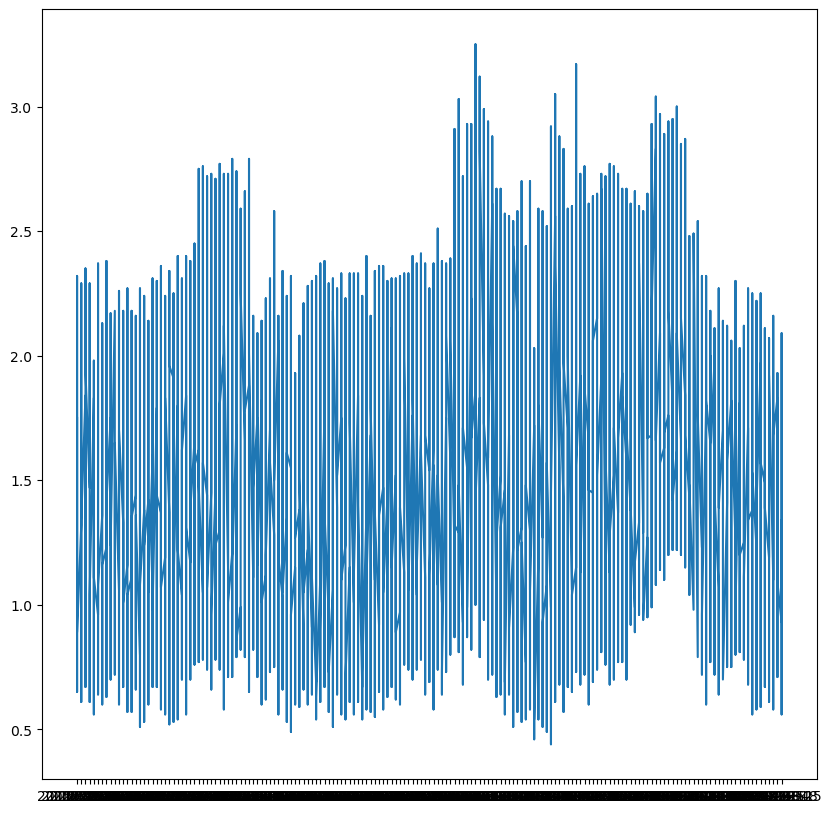

In [8]:
# Дата и средняя цена
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['AveragePrice'])
plt.show("png")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


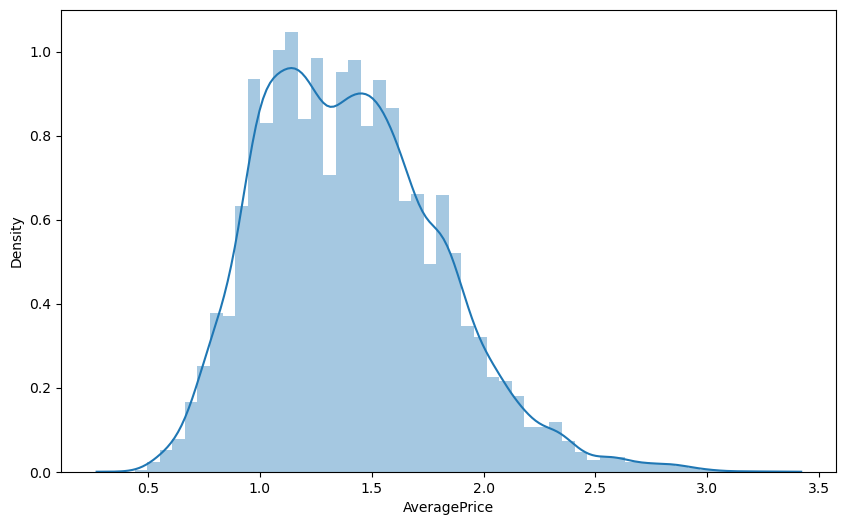

In [9]:
# График распределения средней цены
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"])
plt.show("png")

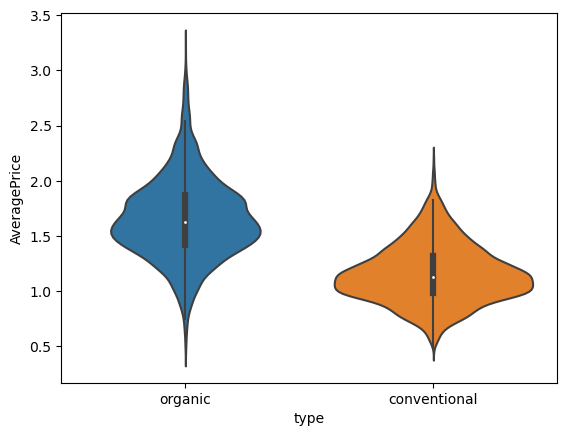

In [10]:
# Постройте график зависимости средней цены от типа авокадо
sns.violinplot(y="AveragePrice", x="type", data = df)
plt.show("png")

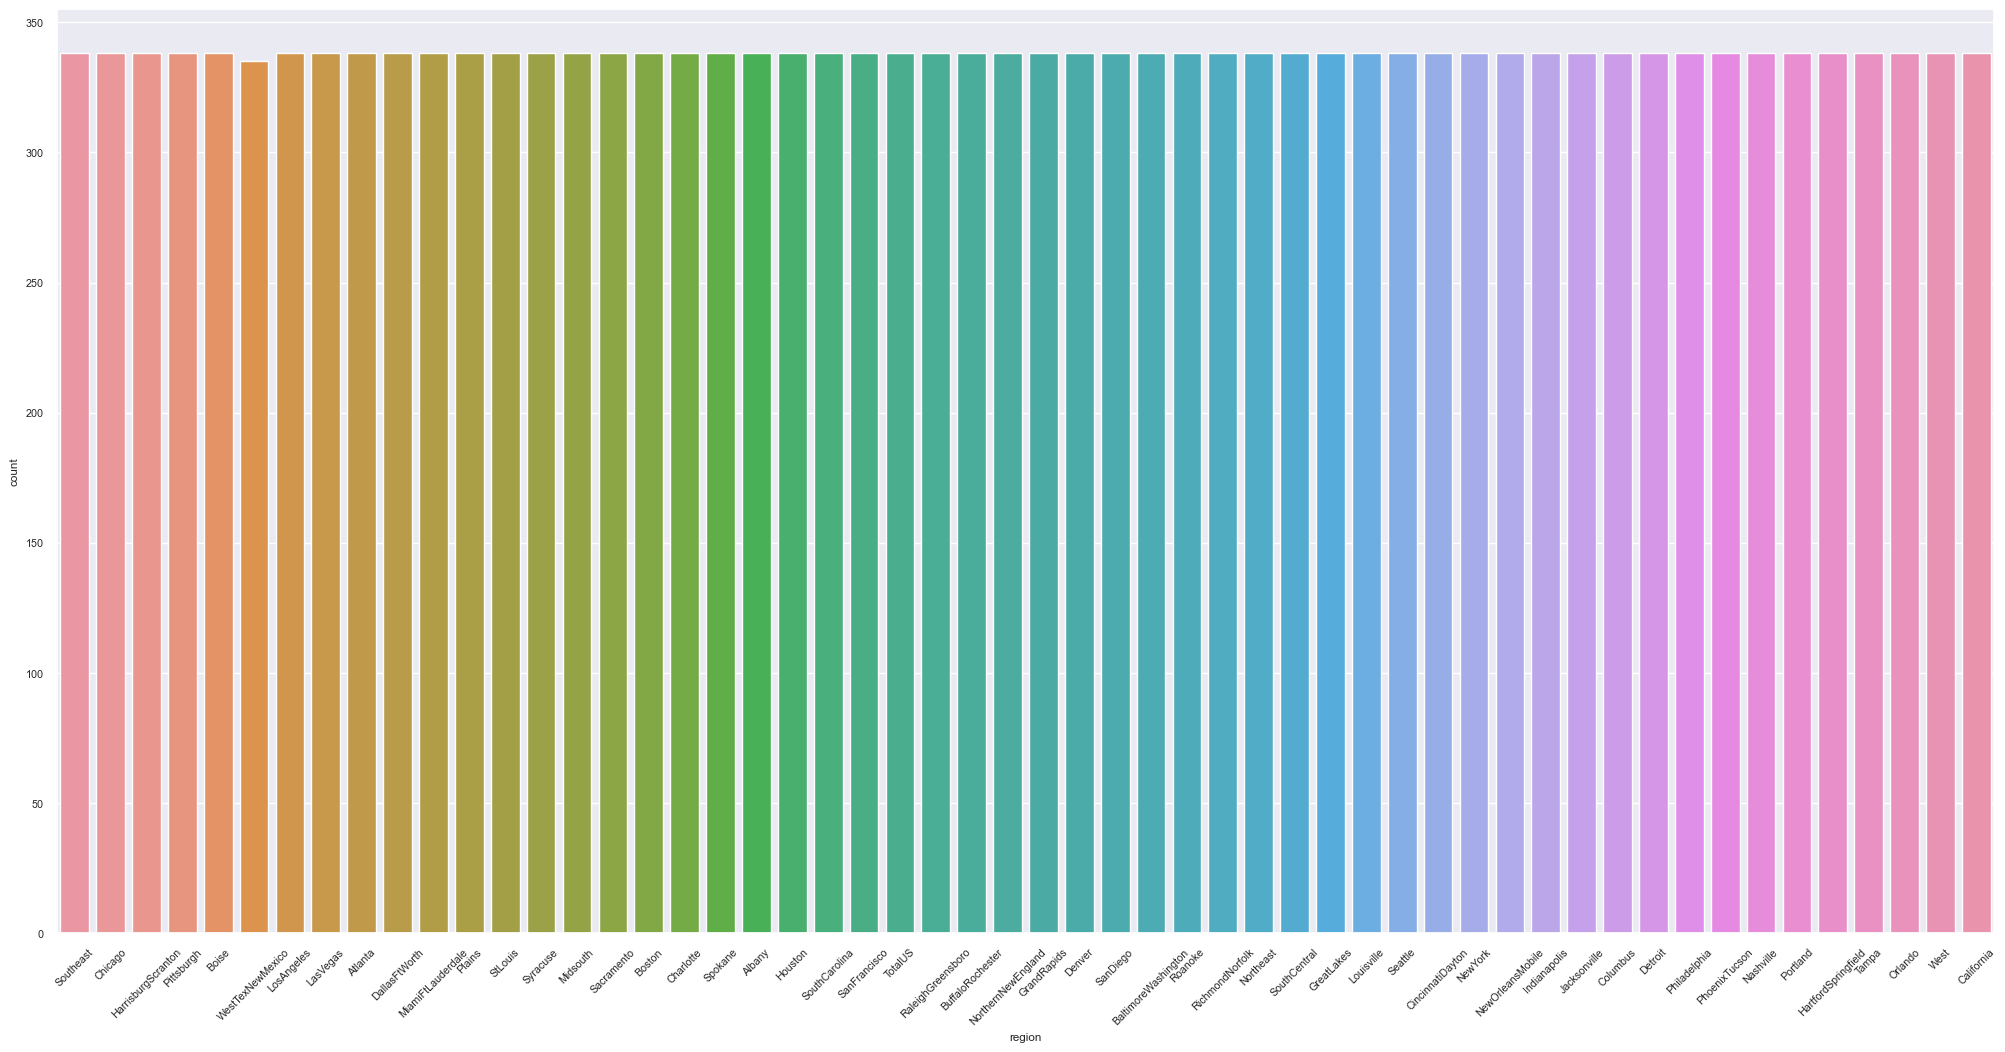

In [11]:
# Гистограмма для обозначения количества регионов 
sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)
plt.show("png")

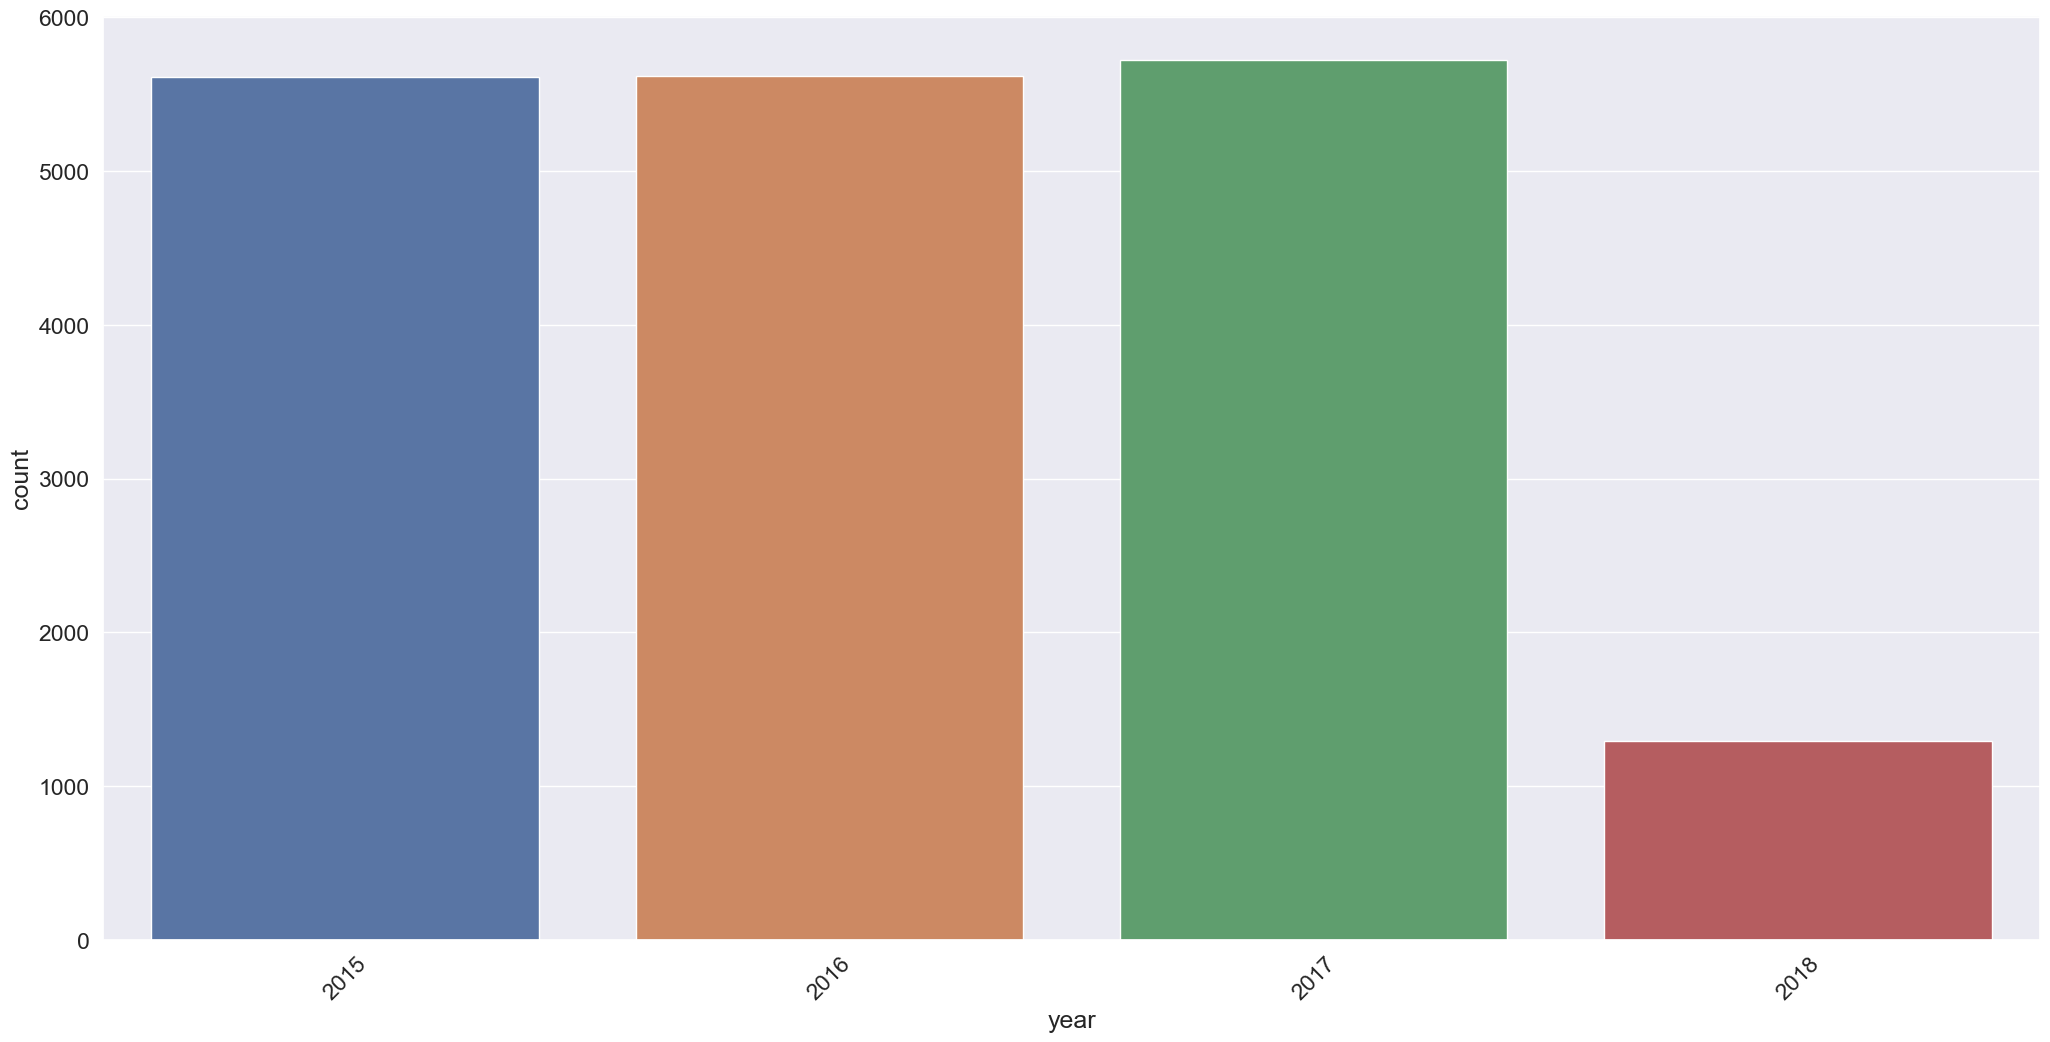

In [12]:
# Гистограмма для отображения количества в каждом году
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)
plt.show("png")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


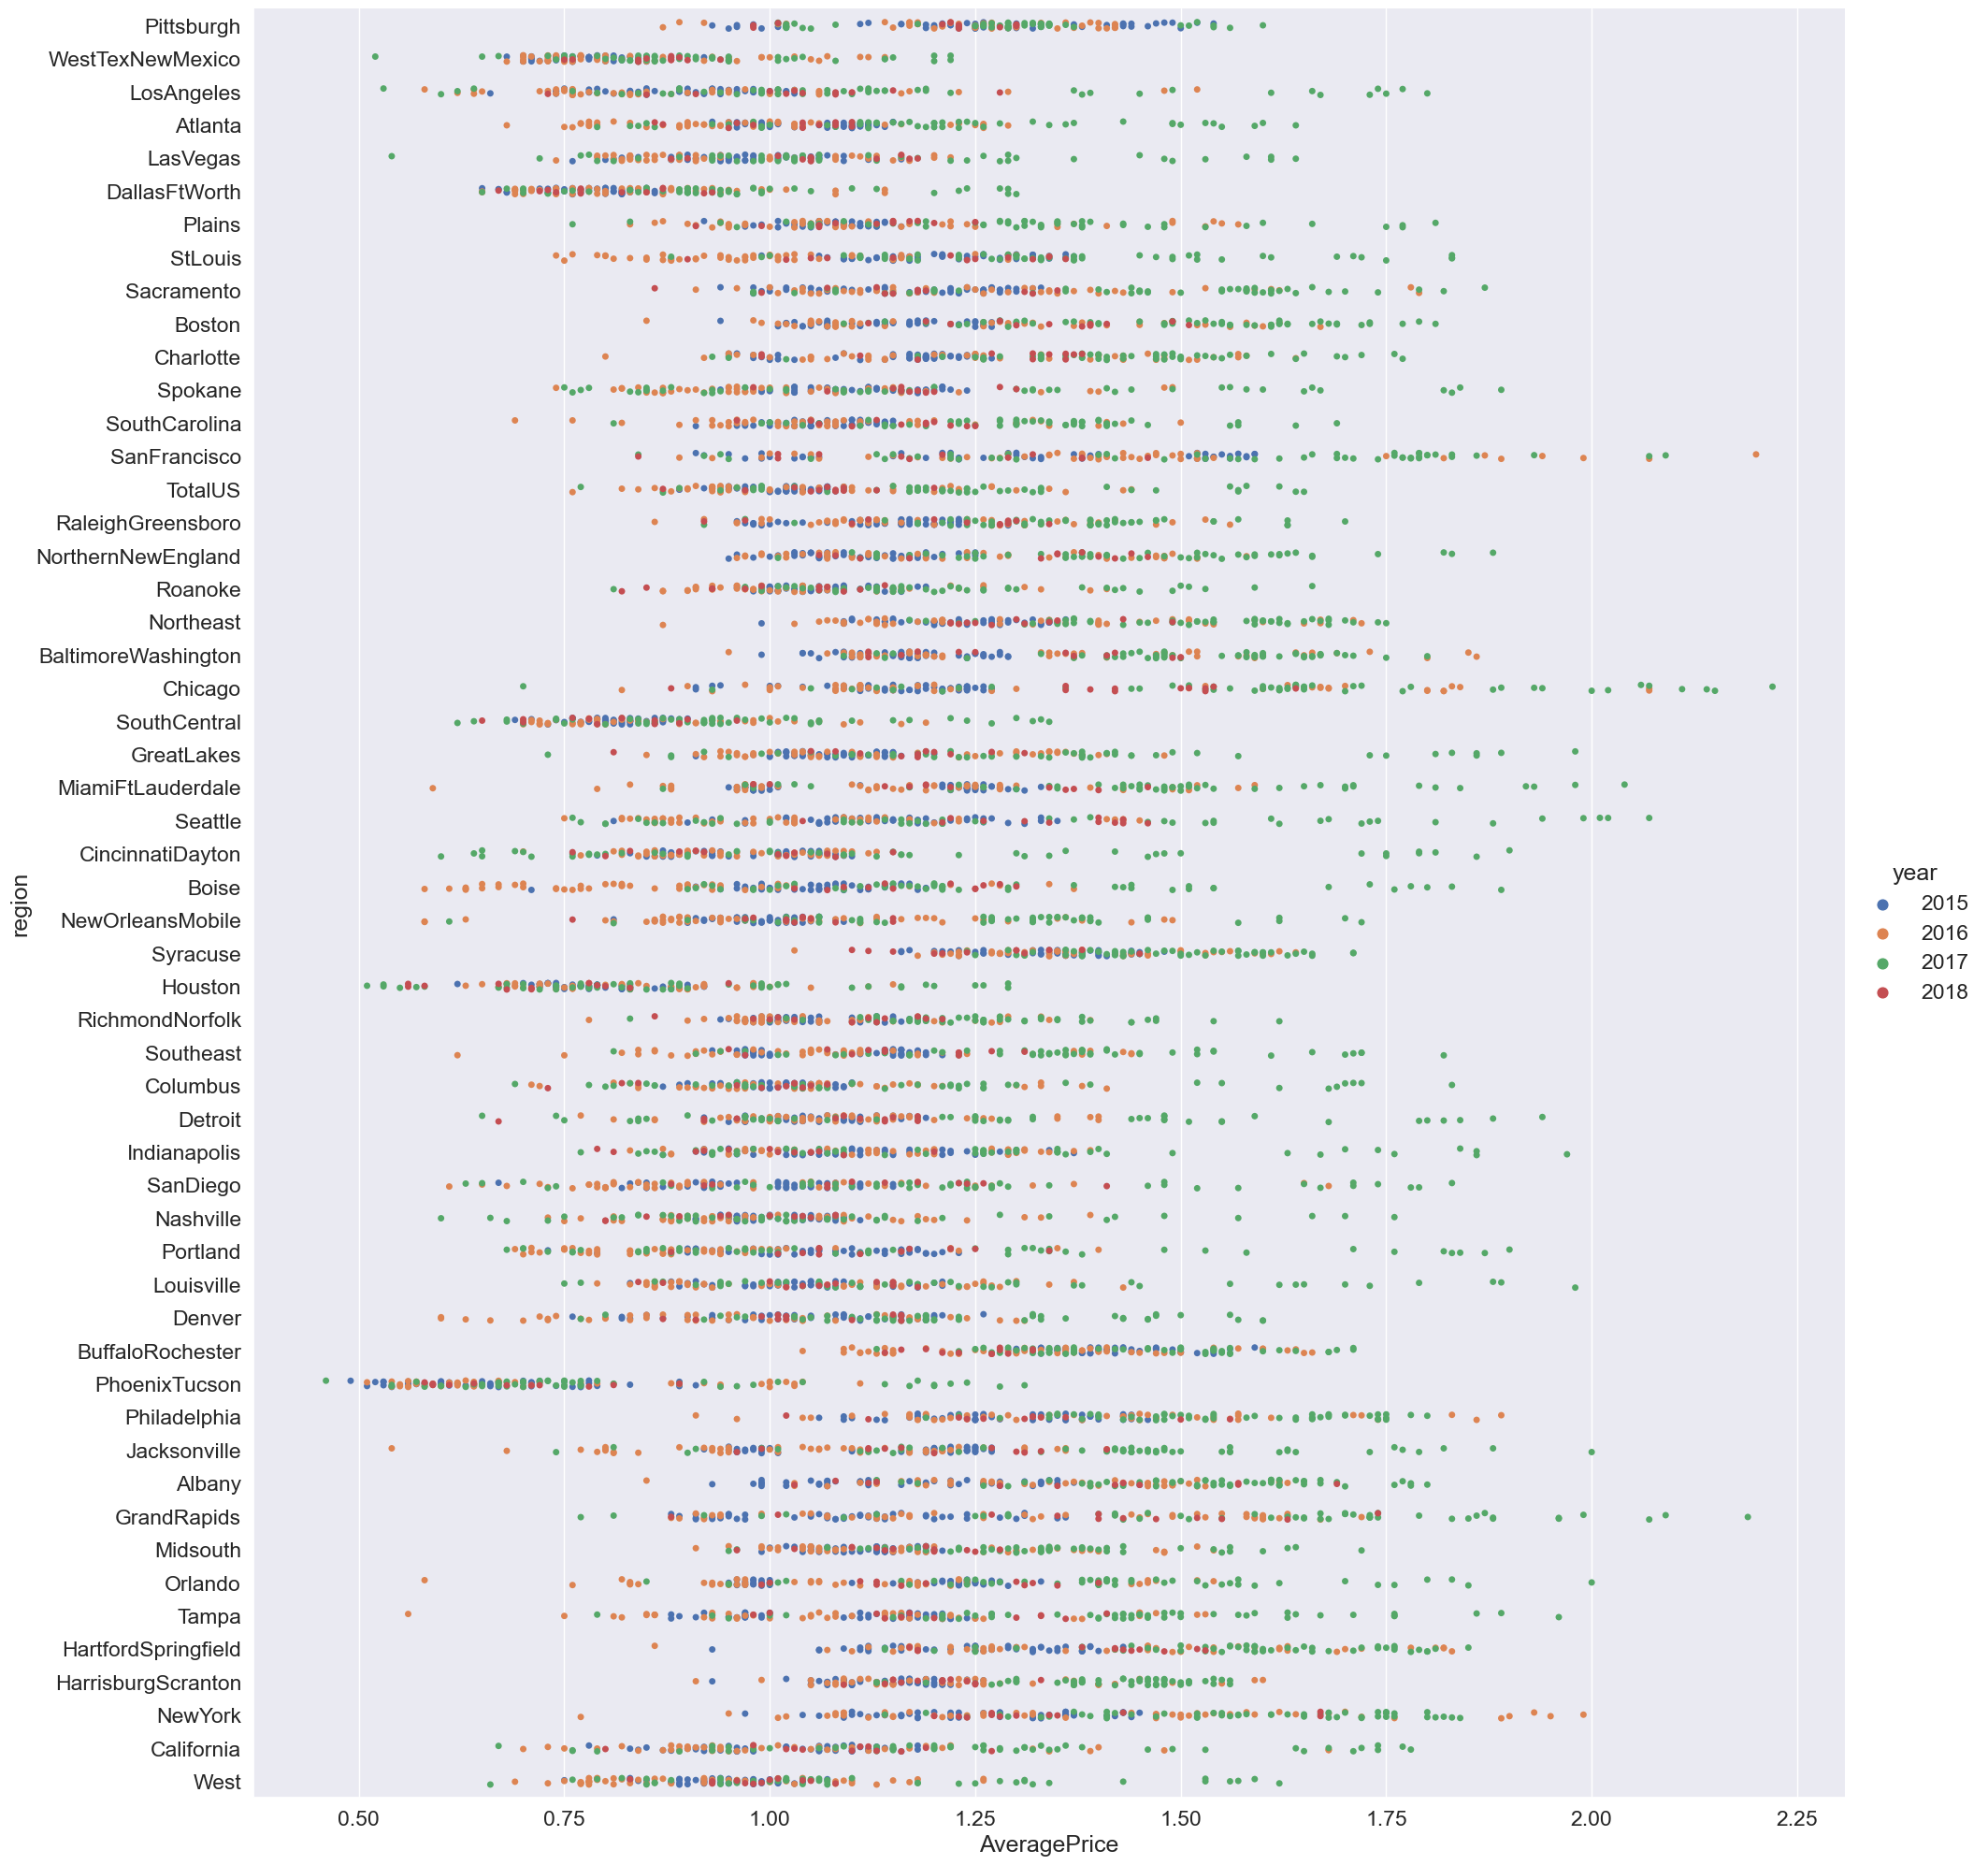

In [13]:
 # строим график зависимости цен на авокадо от регионов для обычных авокадо
conventional = sns.catplot("AveragePrice", "region", data = df[df["type"] == "conventional"], hue="year", height=20)
plt.show("png")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


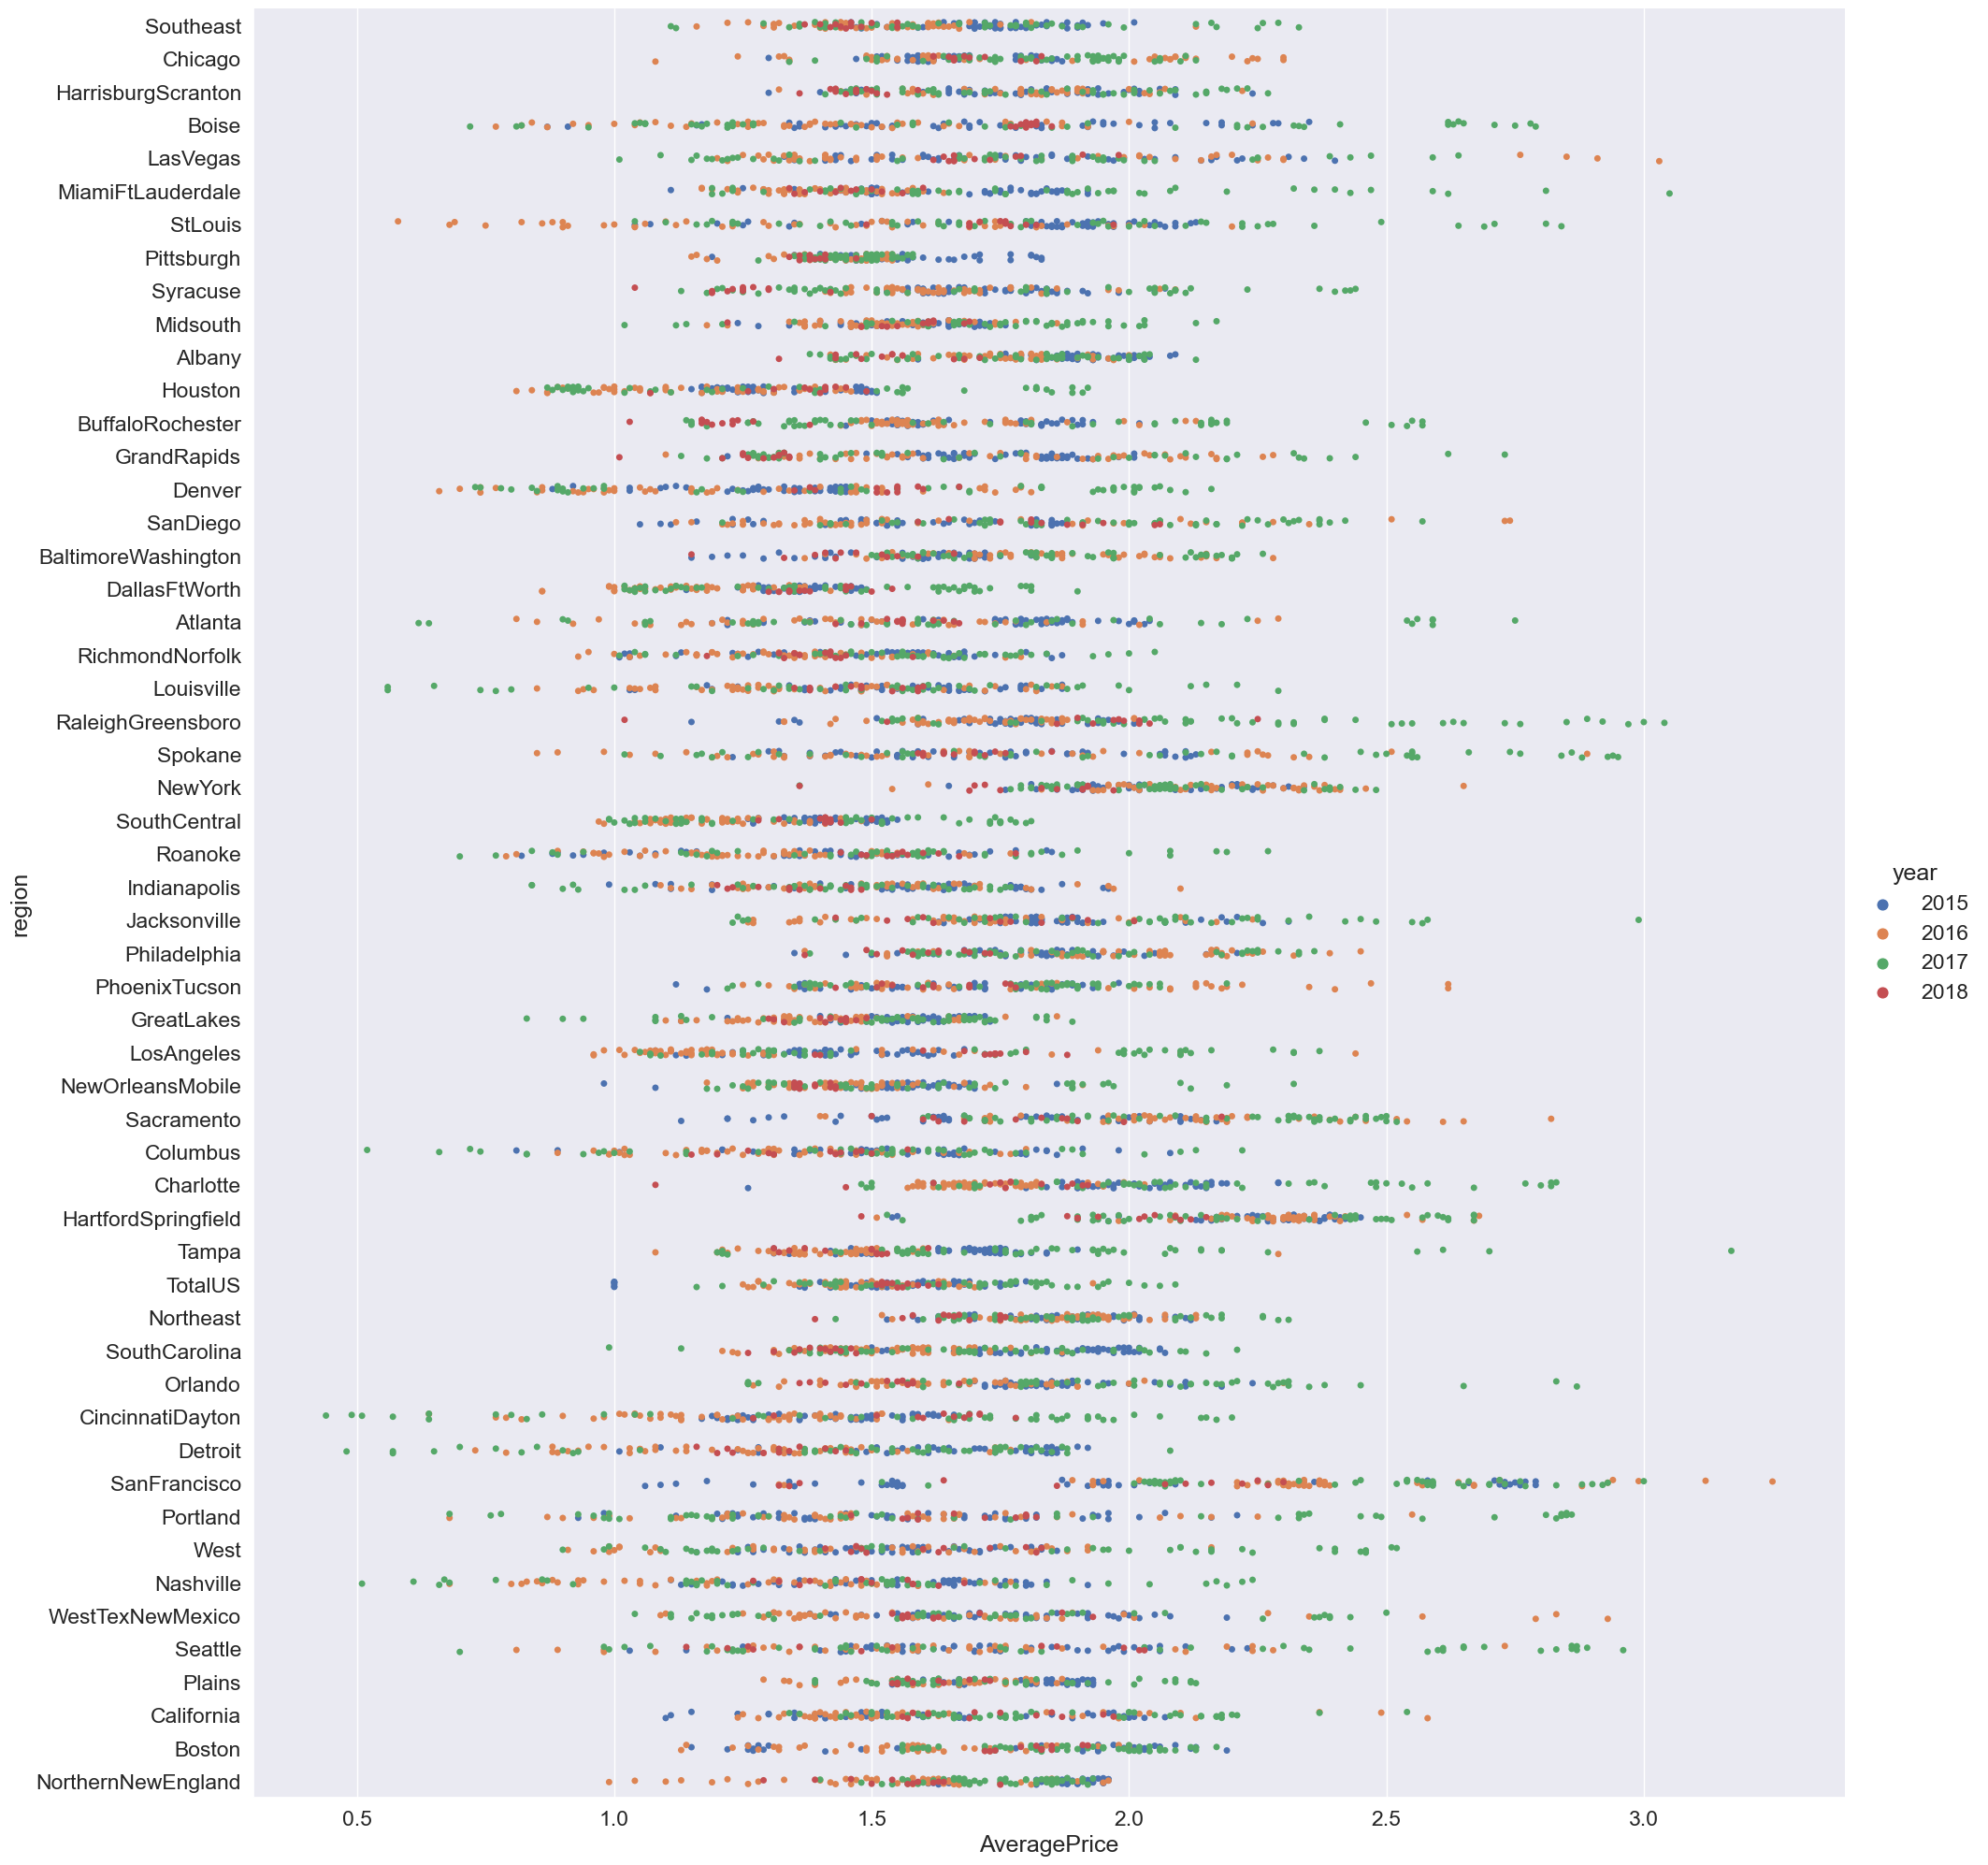

In [14]:
# строим график зависимости цен на авокадо от регионов для органических авокадо
conventional = sns.catplot("AveragePrice", "region", data = df[df["type"] == "organic"], hue="year", height=20)
plt.show("png")

### Подготовка данных перед применением инструмента facebook prophet 

In [15]:
avocado_prophet_df = df[["Date", "AveragePrice"]]

In [17]:
avocado_prophet_df = avocado_prophet_df.rename(columns={"Date": "ds", "AveragePrice":"y"})

In [18]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


### Разработка модели и прогнозы

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
# Прогнозирование будущего
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

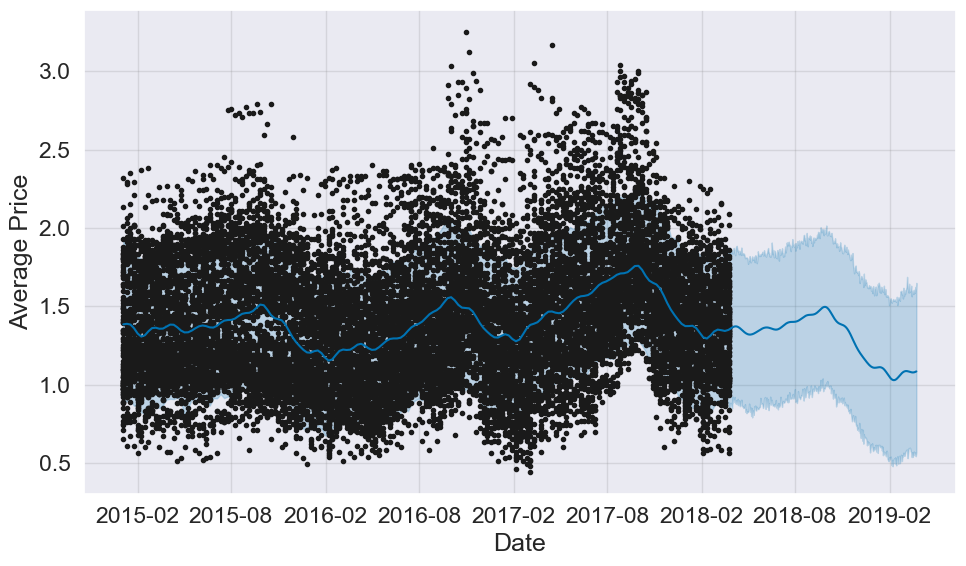

In [21]:
figure = m.plot(forecast, xlabel="Date", ylabel="Average Price")
plt.show("png")

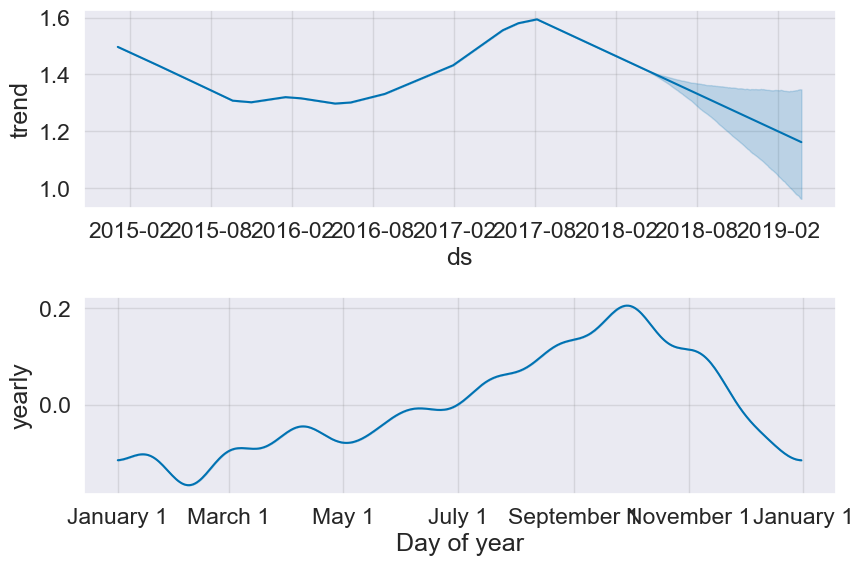

In [22]:
figure2 = m.plot_components(forecast)
plt.show("png")

### Прогноз по региону

In [24]:
df = pd.read_csv('data.csv')

In [25]:
# Выбираем конкретный регион
region = "Chicago"
df_sample = df[df["region"] == region]

In [26]:
df_sample = df_sample.sort_values(by="Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


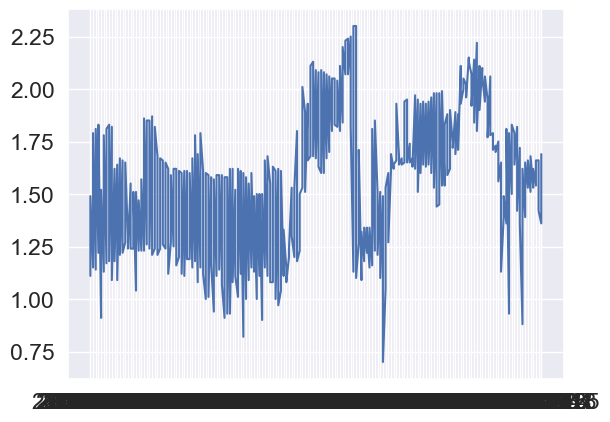

In [27]:
plt.plot(df_sample["Date"], df_sample["AveragePrice"], )
plt.show("png")

In [28]:
df_sample = df_sample.rename(columns={"Date":"ds", "AveragePrice": "y"})

In [30]:
m = Prophet()
m.fit(df_sample)
# Прогнозирование будущего
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


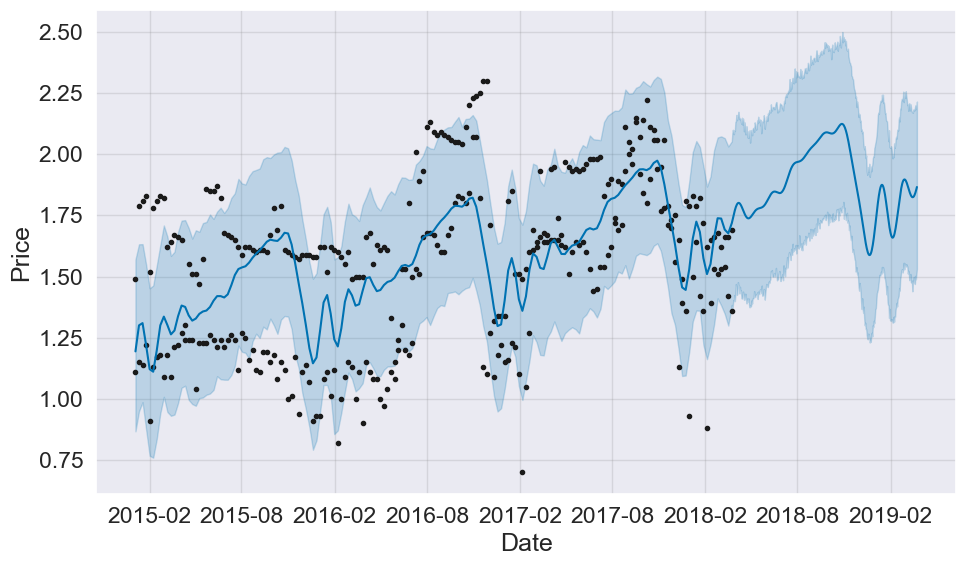

In [31]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
plt.show("png")

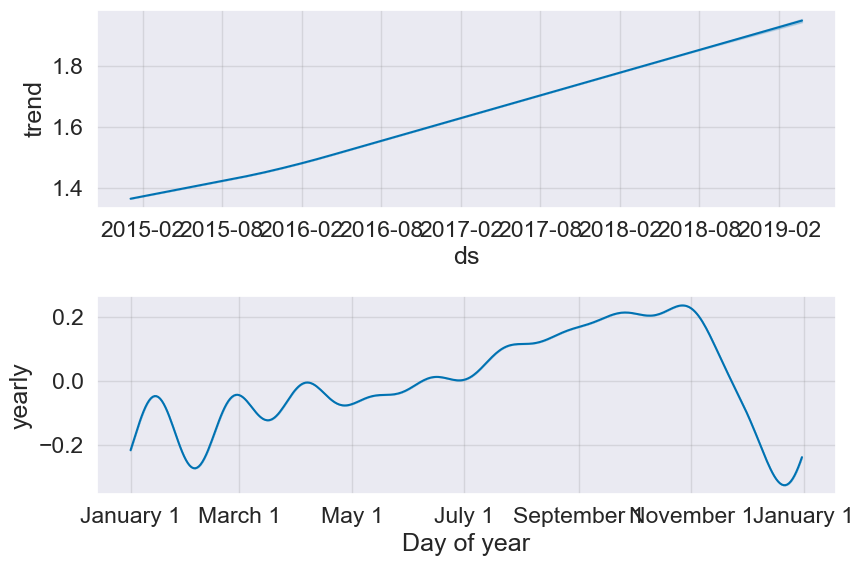

In [32]:
figure3 = m.plot_components(forecast)
plt.show("png")